# Differing GRAE Results

In [1]:
from Helpers.grae_pipeline_helpers import read_all_graeBuild_results
import pandas as pd

2025-02-26 11:13:15.794156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-26 11:13:15.814842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-26 11:13:15.821152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 11:13:15.836448: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-26 11:13:17.632560: W tensorflow/compiler/tf2

In [2]:
grae_results = read_all_graeBuild_results()

In [17]:
grae_results["Anchor_Percent"].unique()

array([0.3, 1. ])

In [3]:
grae_results

,method,dataset,split,lam,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,NAMA,heart_failure,random,100,original,0.107139,0.707113,0.683333,0.666667,0.644619,...,0.658996,0.733333,0.633333,0.685926,0.612623,0.633333,0.566667,0.507292,0.469772,0.3
1,NAMA,flare1,distort,100,anchor_loss050,0.026515,0.864341,0.907692,0.892308,0.863772,...,0.864341,0.907692,0.907692,0.863772,0.885030,0.907692,0.923077,0.863772,0.896435,1.0
2,MASH-,tic-tac-toe,skewed,100,anchor_loss050,0.057663,0.839426,0.687500,0.619792,0.678977,...,0.837467,0.671875,0.619792,0.662001,0.612437,0.734375,0.645833,0.733886,0.641519,1.0
3,MASH,segmentation,random,100,anchor_loss050,0.058807,0.821429,0.744186,0.720930,0.734989,...,0.779762,0.697674,0.651163,0.699539,0.666435,0.674419,0.627907,0.691063,0.649077,1.0
4,MAPA,parkinsons,even,100,original,0.085656,0.634615,0.769231,0.769231,0.668896,...,0.647436,0.641026,0.564103,0.600962,0.554855,0.794872,0.794872,0.724887,0.724887,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15249,SSMA,balance_scale,even,100,anchor_loss050,0.392542,0.532000,0.656000,0.712000,0.633210,...,0.541000,0.416000,0.528000,0.367130,0.524385,0.448000,0.440000,0.436951,0.422466,1.0
15250,MAPA,Automobile,skewed,100,anchor_loss050,0.101235,-0.260301,0.153169,-0.078179,1.092859,...,-0.329804,-0.209295,-0.286345,1.305966,1.346928,0.064173,0.257007,1.148850,1.023665,1.0
15251,MAGAN,heart_failure,even,100,original,0.043818,0.654812,0.700000,0.733333,0.625974,...,0.700837,0.700000,0.750000,0.604000,0.729443,0.666667,0.733333,0.604167,0.683333,1.0
15252,SPUD,EnergyEfficiency,even,100,anchor_loss050,0.093229,0.891565,0.856028,0.873564,0.386927,...,0.906621,0.844587,0.913389,0.402007,0.300108,0.817655,0.873181,0.435449,0.363146,0.3


In [4]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()#.plot(x="grae_build", y="MSE", kind="bar", title="MSE for GRAE")

,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,full_rf_metricA,full_knn_scoreB,full_rf_scoreB,full_knn_metricB,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,anchor_loss050,0.077012,0.584456,0.606731,0.594983,0.675479,0.682325,0.532827,0.512418,0.667969,...,0.587908,0.507724,0.468306,0.665285,0.682390,0.589732,0.561919,0.668825,0.675801,0.794236
1,anchor_loss100,0.076097,0.585834,0.607871,0.594764,0.673572,0.681400,0.535091,0.514833,0.666792,...,0.588610,0.510202,0.473858,0.662964,0.679043,0.591346,0.562086,0.666375,0.674071,0.795149
2,anchor_loss150,0.075067,0.588283,0.608789,0.597099,0.672917,0.680587,0.537614,0.521139,0.667603,...,0.591007,0.511921,0.477621,0.665231,0.681451,0.591452,0.566312,0.664941,0.673857,0.793207
3,original,0.076106,0.585362,0.607482,0.595569,0.675650,0.681444,0.532833,0.515434,0.669268,...,0.588285,0.507903,0.471889,0.665755,0.682269,0.589975,0.561586,0.669828,0.677527,0.793587


In [5]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max")

,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,1.0,1.0,1.0,3.0,4.0,1.0,2.0,3.0,3.0,3.0
1,3.0,3.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0,4.0
2,4.0,4.0,4.0,2.0,2.0,4.0,4.0,1.0,1.0,1.0
3,2.0,2.0,2.0,4.0,3.0,2.0,1.0,4.0,4.0,2.0


In [6]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max").sum(axis=1)

0    22.0
1    25.0
2    27.0
3    26.0
dtype: float64

In [7]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].sum(axis=1)

0    6.202126
1    6.203703
2    6.217001
3    6.208604
dtype: float64

In [8]:
grae_results.columns

Index(['method', 'dataset', 'split', 'lam', 'grae_build', 'MSE', 'full_rf_oob',
       'full_knn_scoreA', 'full_rf_scoreA', 'full_knn_metricA',
       'full_rf_metricA', 'full_knn_scoreB', 'full_rf_scoreB',
       'full_knn_metricB', 'full_rf_metricB', 'pred_rf_oob', 'pred_knn_scoreA',
       'pred_rf_scoreA', 'pred_knn_metricA', 'pred_rf_metricA',
       'pred_knn_scoreB', 'pred_rf_scoreB', 'pred_knn_metricB',
       'pred_rf_metricB', 'Anchor_Percent'],
      dtype='object')

<Axes: title={'center': 'Results'}, xlabel='grae_build'>

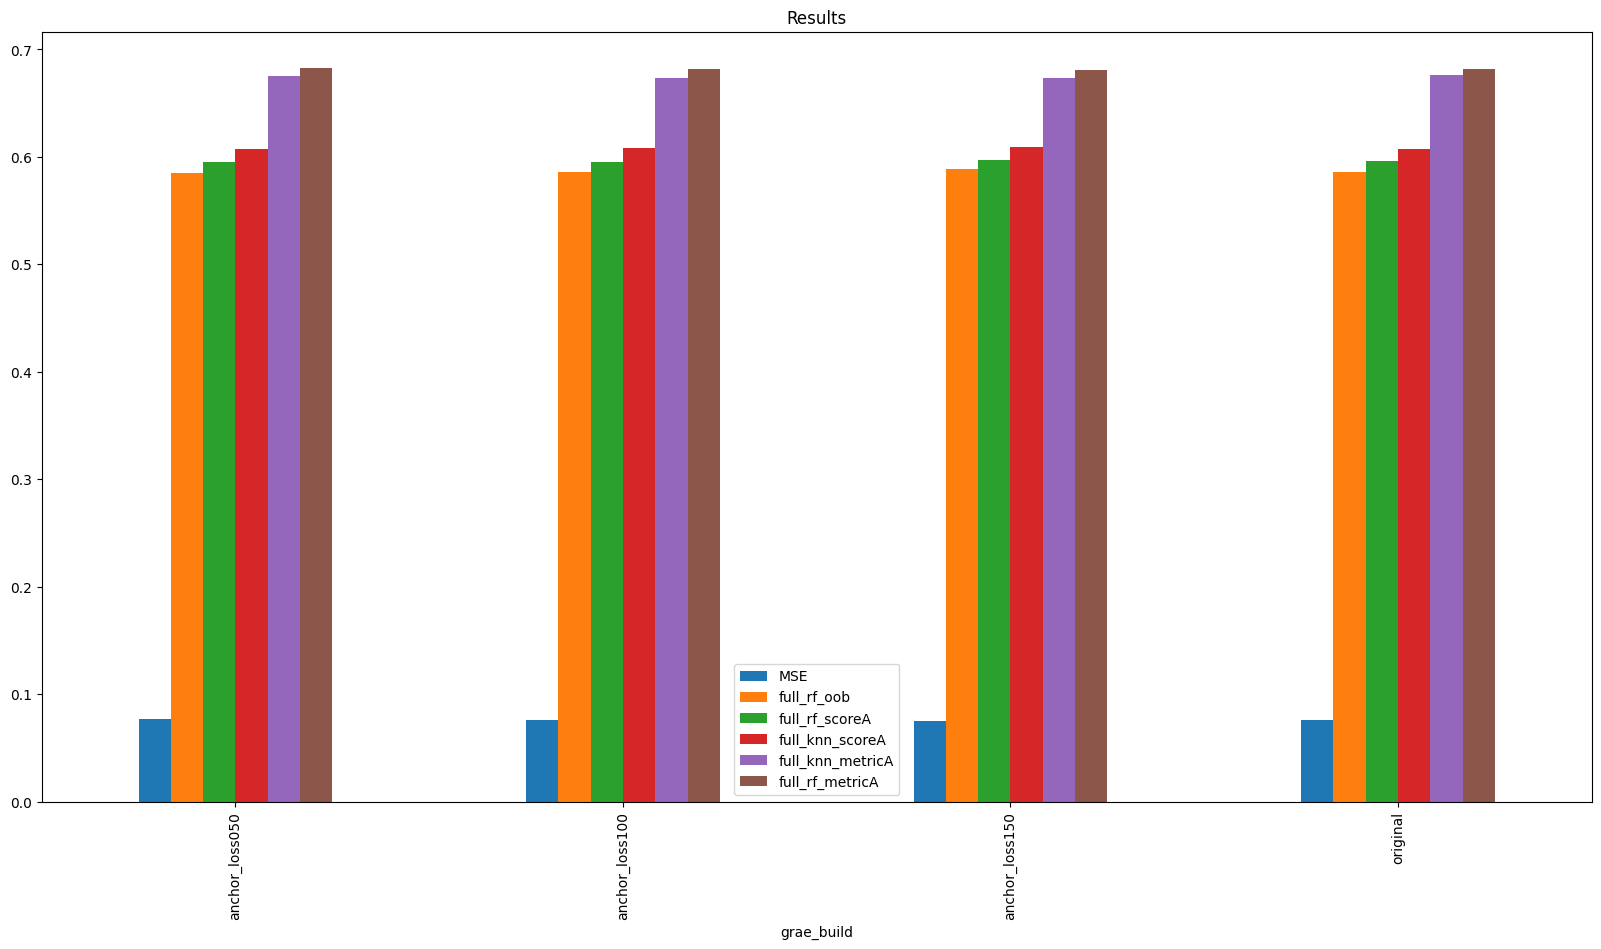

In [9]:
Col = grae_results.columns[4:][[0,1, 2,3,4,5,6]]
df = grae_results[Col].groupby("grae_build").mean().reset_index()
ordered_cols = ["grae_build"] + sorted(list(Col[1:]), key=lambda c: df[c].min())
df.plot(x="grae_build", y=ordered_cols[1:], kind="bar", title="Results", figsize=(20,10))

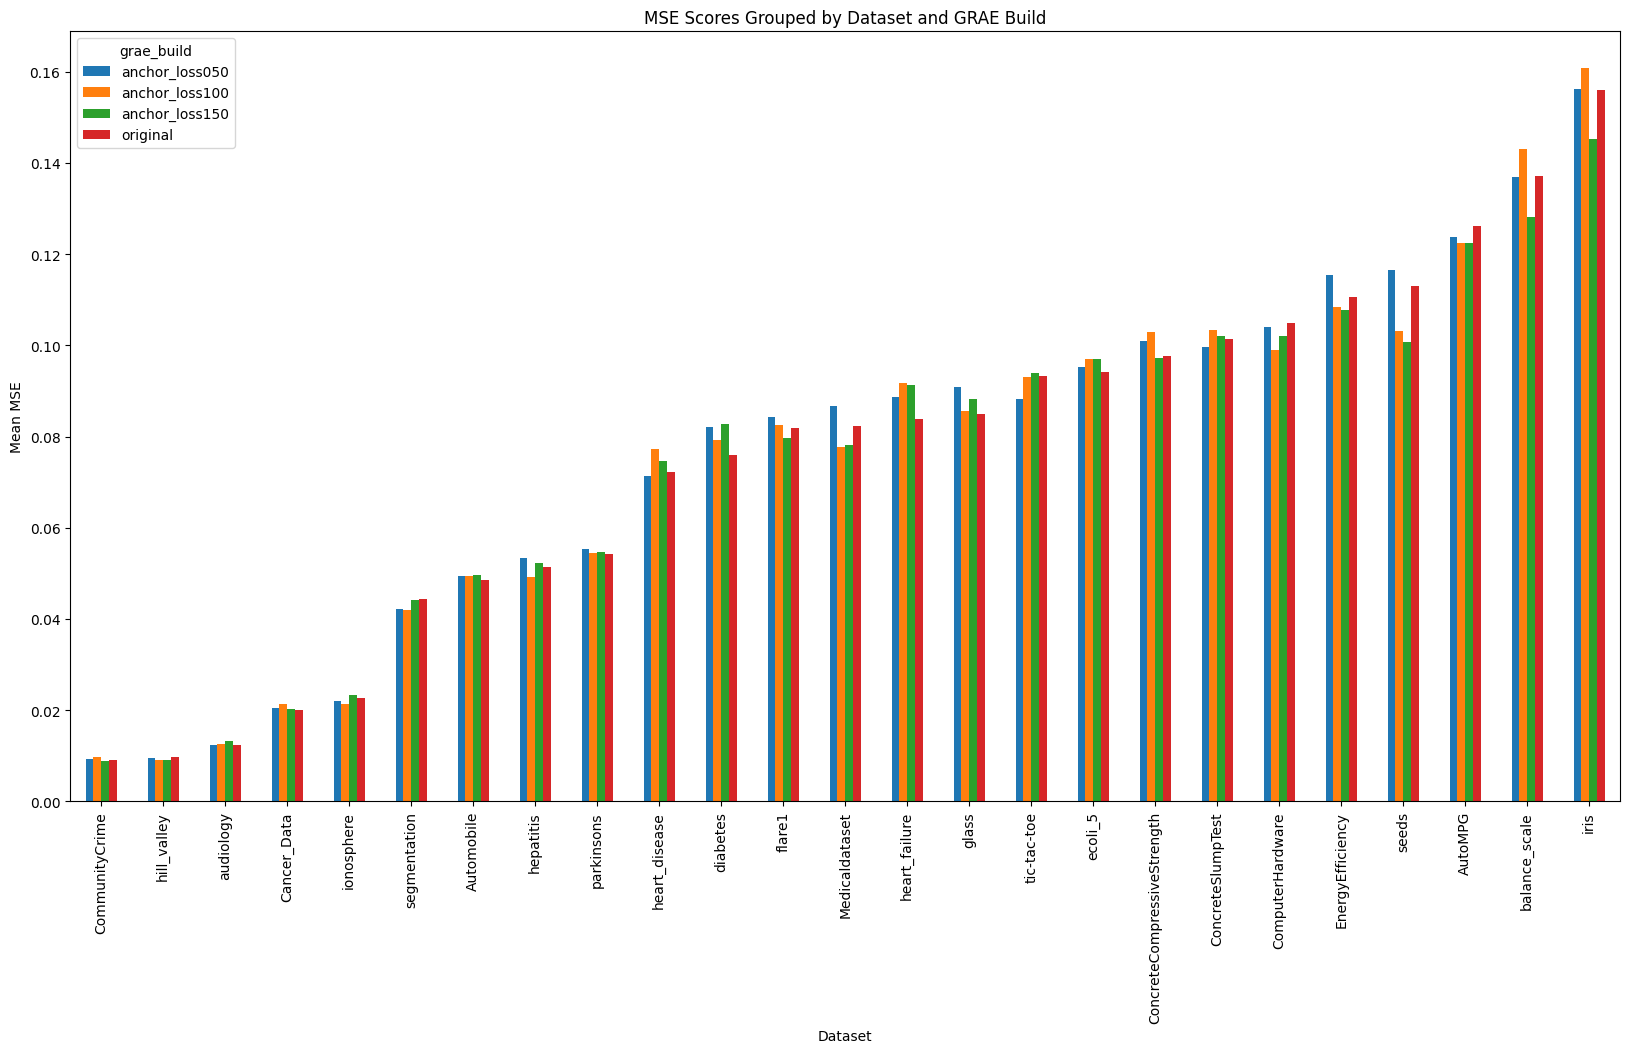

In [10]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

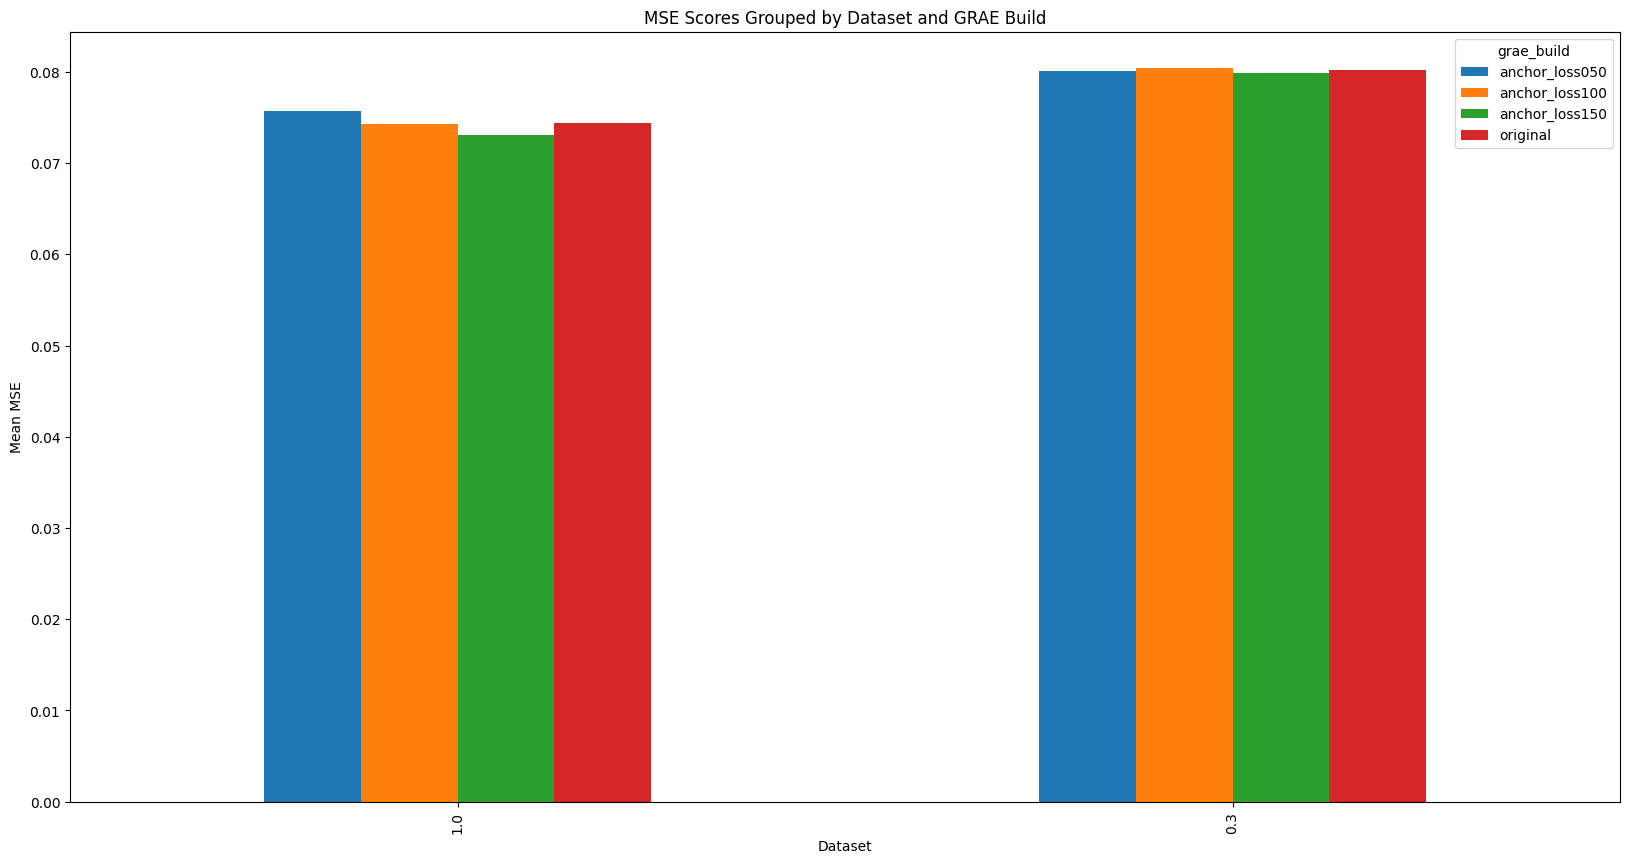

In [16]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['Anchor_Percent', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

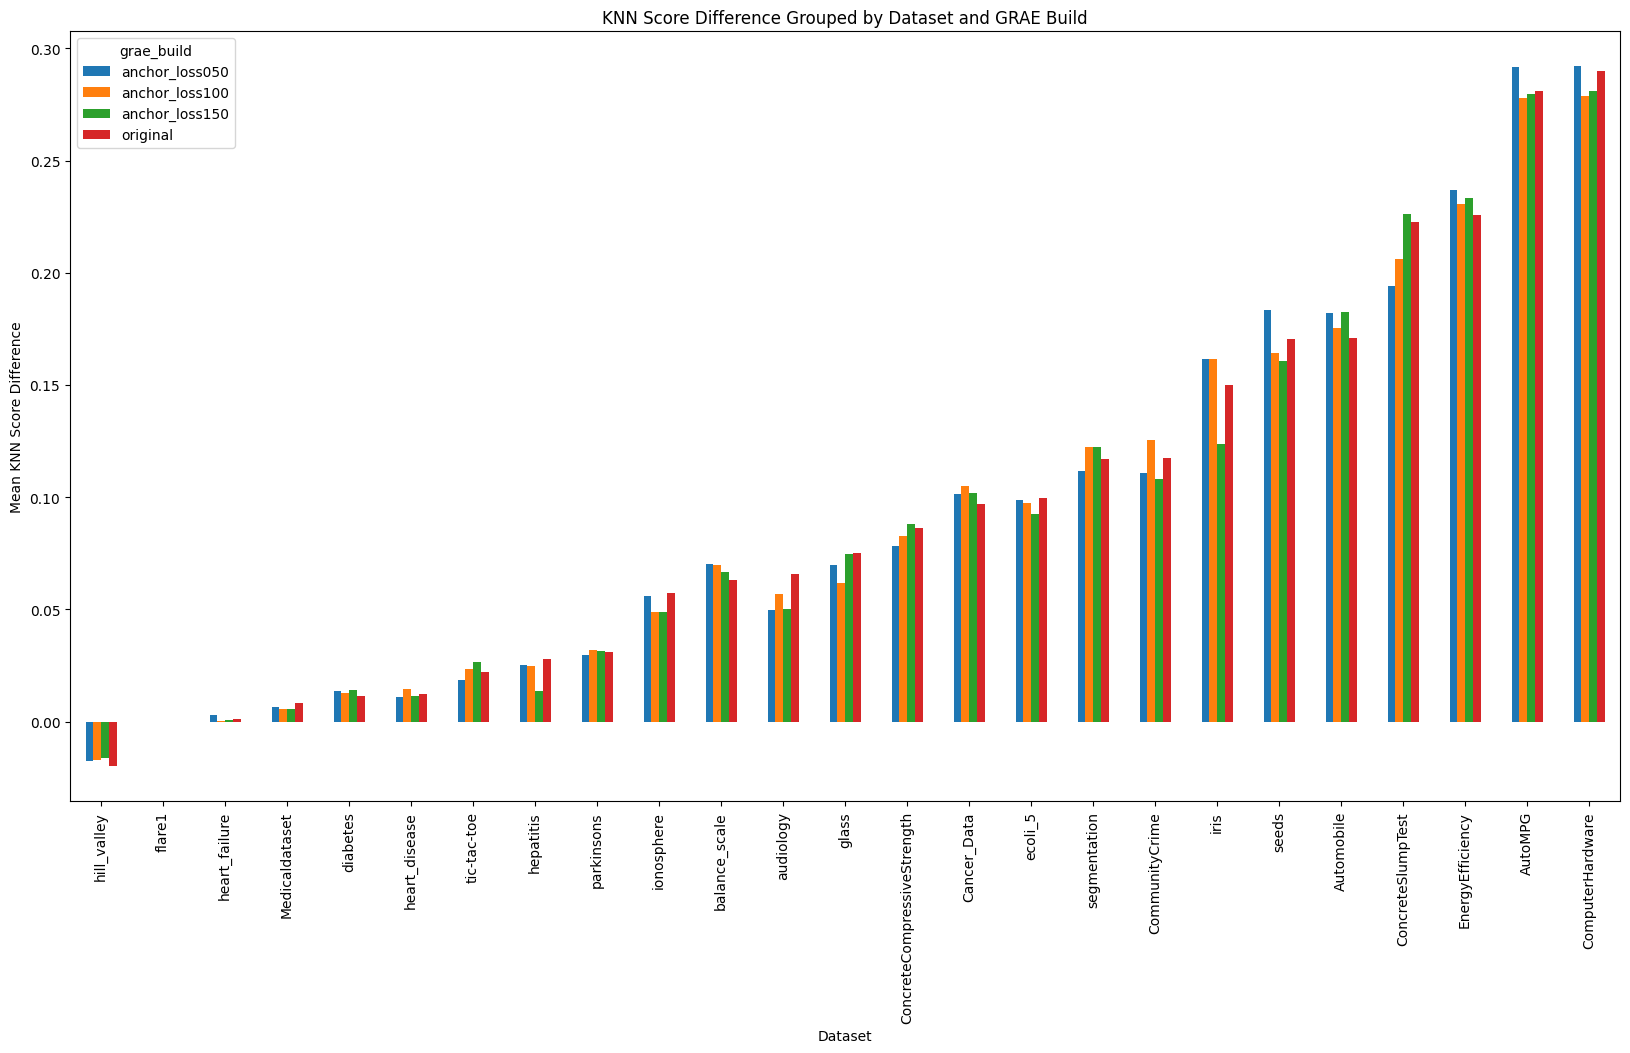

In [11]:
import matplotlib.pyplot as plt

# Calculate the difference between full_knn_scoreA and pred_knn_scoreA
grae_results['knn_score_diff'] = grae_results['full_knn_scoreA'] - grae_results['pred_knn_scoreA']

# Group by dataset and grae_build, then calculate the mean of the difference
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['knn_score_diff'].mean().unstack()

# Sort the DataFrame by the mean difference of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='KNN Score Difference Grouped by Dataset and GRAE Build')
plt.ylabel('Mean KNN Score Difference')
plt.xlabel('Dataset')
plt.show()

# Testing the Pipeline

In [1]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_for_parrelization(extract_all_files())
tasks[0:3]

2025-02-26 11:22:40.082742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-26 11:22:40.103442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-26 11:22:40.109807: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 11:22:40.125146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-26 11:22:41.942152: W tensorflow/compiler/tf2

[('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.1,
  'anchor_loss050',
  42),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.5,
  'anchor_loss050',
  42),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  1,
  'anchor_loss050',
  42)]

In [2]:
task_iris = next(task for task in tasks if task[4] == 0.1)
task_iris

('SPUD',
 'ComputerHardware',
 'random',
 {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
 0.1,
 'anchor_loss050',
 42)

In [14]:
GRAE_tests(*tasks[15])

Results already exist for MAPA, ComputerHardware, turn.


False

In [15]:
#Get the embeddings
emb_pred, emb_full, labels = get_embeddings(*task_iris)

# Calculate MSE between embeddings
train_len = len(labels[0])
test_len = train_len + len(labels[1])
mse_emb_pred = np.vstack([emb_pred[train_len:test_len], emb_pred[test_len + train_len:]])
mse_emb_full = np.vstack([emb_full[train_len:test_len], emb_full[test_len + train_len:]])
mse = mean_squared_error(mse_emb_pred, mse_emb_full)